In [1]:
import sys
sys.path.append('../../')
import helper

import numpy as np
from pandas import read_excel, DataFrame, get_dummies
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
train = read_excel('https://data.hossam.kr/F03/biostat.xlsx')

In [4]:
train.head()

,id,age,sex,weight,OP_date,Recur,Recur_1y,Recur_date,SBP,CA19.9,CRP,CEA,post.CEA,stage,smoking,obesity,post.CA19.9,post.CA19.9.binary,post.CA19.9.3grp
0,1,82,1,73.994588,2014-07-10,1,0,2015-08-12,144.286869,4490.5,0.1,3.0,5.1,3,1,1,36.795194,0,1
1,2,50,0,64.819694,2013-05-08,0,0,2018-07-07,108.590964,36.7,0.1,1.1,1.5,3,1,0,32.765043,0,1
2,3,28,1,63.204675,2016-05-06,0,0,2020-01-13,5.629379,36.7,0.1,10.7,12.4,3,1,0,31.133072,0,1
3,4,35,1,52.499192,2015-11-24,1,0,2017-08-07,143.931300,64.9,1.3,1.3,0.4,3,1,1,36.134051,0,1
4,5,49,1,72.766264,2015-02-12,1,0,2016-06-02,172.653143,38.2,10.7,3.7,0.4,3,1,0,33.921657,0,1


In [5]:
# OP_date, Recur_ly, Recur_date, post.CA19.9.binary, post.CA19.9.3grp
df = train.drop(['OP_date', 'Recur_1y', 'Recur_date', 'post.CA19.9.binary', 'post.CA19.9.3grp', 'sex', 'id'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          156 non-null    int64  
 1   weight       156 non-null    float64
 2   Recur        156 non-null    int64  
 3   SBP          156 non-null    float64
 4   CA19.9       156 non-null    float64
 5   CRP          156 non-null    float64
 6   CEA          156 non-null    float64
 7   post.CEA     156 non-null    float64
 8   stage        156 non-null    int64  
 9   smoking      156 non-null    int64  
 10  obesity      156 non-null    int64  
 11  post.CA19.9  156 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 14.8 KB


In [6]:
df.describe()

,age,weight,Recur,SBP,CA19.9,CRP,CEA,post.CEA,stage,smoking,obesity,post.CA19.9
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,56.858974,68.125624,0.538462,115.898871,1158.631410,3.062821,3.930128,5.363462,2.269231,0.262821,0.384615,48.193259
std,12.790343,14.467480,0.500124,37.701583,6709.440806,3.550361,4.135752,12.846207,0.813960,0.441583,0.488071,22.921452
min,25.000000,40.000000,0.000000,5.629379,1.000000,0.100000,0.300000,0.100000,1.000000,0.000000,0.000000,30.760115
25%,50.000000,58.257205,0.000000,89.074804,10.400000,0.100000,1.500000,0.600000,2.000000,0.000000,0.000000,34.908674
50%,58.000000,69.084391,1.000000,114.647853,23.150000,1.300000,2.400000,1.650000,2.500000,0.000000,0.000000,41.285774
75%,65.000000,80.053547,1.000000,144.331917,61.725000,4.850000,4.525000,4.800000,3.000000,1.000000,1.000000,51.216016
max,82.000000,95.000000,1.000000,206.847716,48599.800000,12.300000,20.400000,118.500000,3.000000,1.000000,1.000000,174.433426


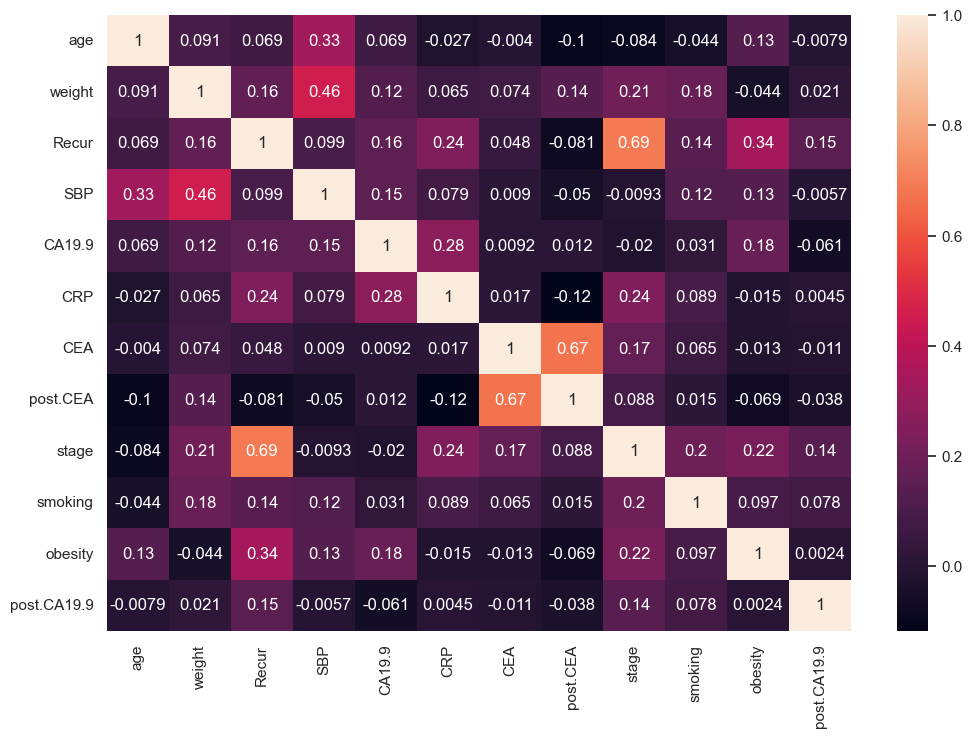

In [7]:
plt.figure(figsize=(12,8))
sb.set(font_scale=1.0)
sb.heatmap(df.corr(), annot=True, cbar=True)
plt.show()

In [8]:
# stage, CRP, obesity, CA19.9, weight, Recur
x = df[['stage', 'CRP', 'obesity']]
y = df[['Recur']]

In [9]:
x.describe()

,stage,CRP,obesity
count,156.000000,156.000000,156.000000
mean,2.269231,3.062821,0.384615
std,0.813960,3.550361,0.488071
min,1.000000,0.100000,0.000000
25%,2.000000,0.100000,0.000000
50%,2.500000,1.300000,0.000000
75%,3.000000,4.850000,1.000000
max,3.000000,12.300000,1.000000


In [10]:
import pandas as pd
x_df = pd.get_dummies(x, columns = ['stage', 'obesity'], dtype='int')
x_df

,CRP,stage_1,stage_2,stage_3,obesity_0,obesity_1
0,0.1,0,0,1,0,1
1,0.1,0,0,1,1,0
2,0.1,0,0,1,1,0
3,1.3,0,0,1,0,1
4,10.7,0,0,1,1,0
...,...,...,...,...,...,...
151,0.8,0,1,0,1,0
152,3.0,1,0,0,1,0
153,0.1,1,0,0,0,1
154,1.2,1,0,0,1,0


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size=0.3, random_state=777)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((109, 6), (47, 6), (109, 1), (47, 1))

In [12]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(6, )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
result = model.fit(x_train, y_train, epochs = 500, validation_data = (x_test, y_test), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

Epoch 1/500
4/4 [==============================] - 1s 88ms/step - loss: 0.9190 - acc: 0.5872 - val_loss: 0.7968 - val_acc: 0.5319 - lr: 0.0010
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 0.8350 - acc: 0.5963 - val_loss: 0.7570 - val_acc: 0.5319 - lr: 0.0010
Epoch 3/500
4/4 [==============================] - 0s 10ms/step - loss: 0.7878 - acc: 0.5780 - val_loss: 0.7219 - val_acc: 0.5532 - lr: 0.0010
Epoch 4/500
4/4 [==============================] - 0s 10ms/step - loss: 0.7415 - acc: 0.5688 - val_loss: 0.6952 - val_acc: 0.5745 - lr: 0.0010
Epoch 5/500
4/4 [==============================] - 0s 10ms/step - loss: 0.7101 - acc: 0.5963 - val_loss: 0.6779 - val_acc: 0.6170 - lr: 0.0010
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 0.6860 - acc: 0.5963 - val_loss: 0.6589 - val_acc: 0.6170 - lr: 0.0010
Epoch 7/500
4/4 [==============================] - 0s 9ms/step - loss: 0.6631 - acc: 0.6055 - val_loss: 0.6446 - val_acc: 0.6383 - lr: 0.0010
Ep

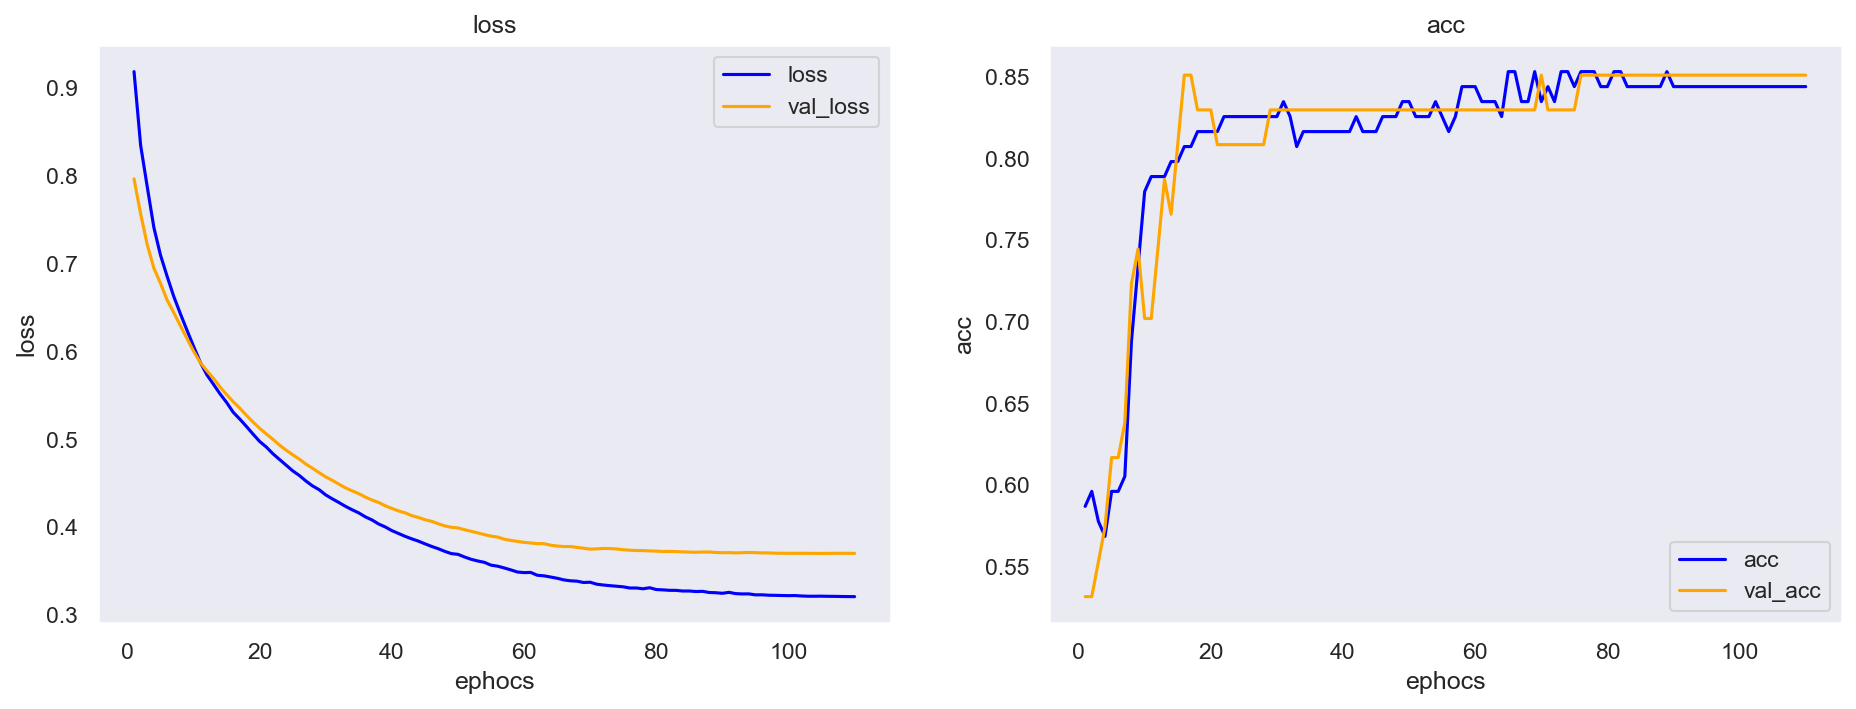

4/4 [==============================] - 0s 1ms/step - loss: 0.3208 - acc: 0.8440
최종 훈련 손실률: 0.320837, 최종 훈련 절대오차: 0.844037
2/2 [==============================] - 0s 3ms/step - loss: 0.3703 - acc: 0.8511
최종 검증 손실률: 0.370284, 최종 검증 절대오차: 0.851064


In [14]:
helper.tf_result_plot(result)

evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

In [15]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

2/2 [==============================] - 0s 2ms/step


In [16]:
train_df = DataFrame(x_train, columns=x_train.columns)
train_df['관측치'] = y_train.values
train_df['예측치'] = train_pred.flatten()

train_df['훈련오차'] = train_df['관측치']-train_df['예측치']

train_df.head()

,CRP,stage_1,stage_2,stage_3,obesity_0,obesity_1,관측치,예측치,훈련오차
154,1.2,1,0,0,1,0,0,0.070798,-0.070798
117,6.7,0,0,1,1,0,1,0.927618,0.072382
49,0.9,1,0,0,0,1,1,0.373413,0.626587
128,0.1,0,0,1,0,1,1,0.906950,0.093050
81,3.8,0,1,0,1,0,0,0.174248,-0.174248


In [17]:
test_df = DataFrame(x_test, columns=x_train.columns)
test_df['관측치'] = y_test.values
test_df['예측치'] = test_pred.flatten()

test_df['훈련오차'] = test_df['관측치']-test_df['예측치']

test_df.head()

,CRP,stage_1,stage_2,stage_3,obesity_0,obesity_1,관측치,예측치,훈련오차
73,4.7,0,0,1,0,1,1,0.965897,0.034103
12,4.4,0,0,1,1,0,1,0.893018,0.106982
94,0.6,1,0,0,0,1,0,0.361419,-0.361419
152,3.0,1,0,0,1,0,0,0.107892,-0.107892
136,8.4,0,0,1,0,1,1,0.974692,0.025308


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missin

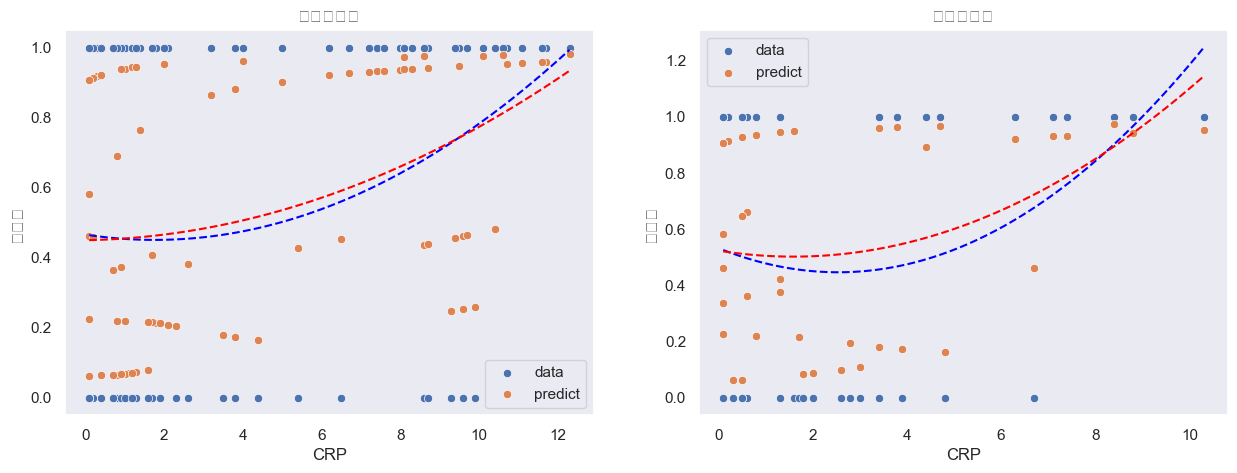

d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1207: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_left, y_left)
d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1214: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_left, y_left_pred)
d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1229: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_right, y_right)
d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1236: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_right, y_right_pred)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_fig

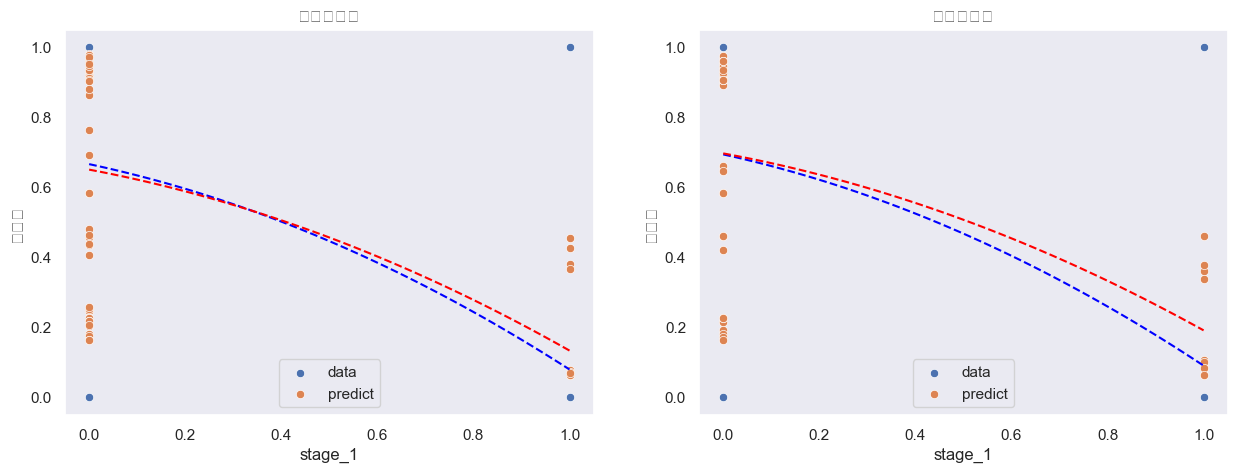

d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1207: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_left, y_left)
d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1214: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_left, y_left_pred)
d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1229: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_right, y_right)
d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1236: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_right, y_right_pred)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_fig

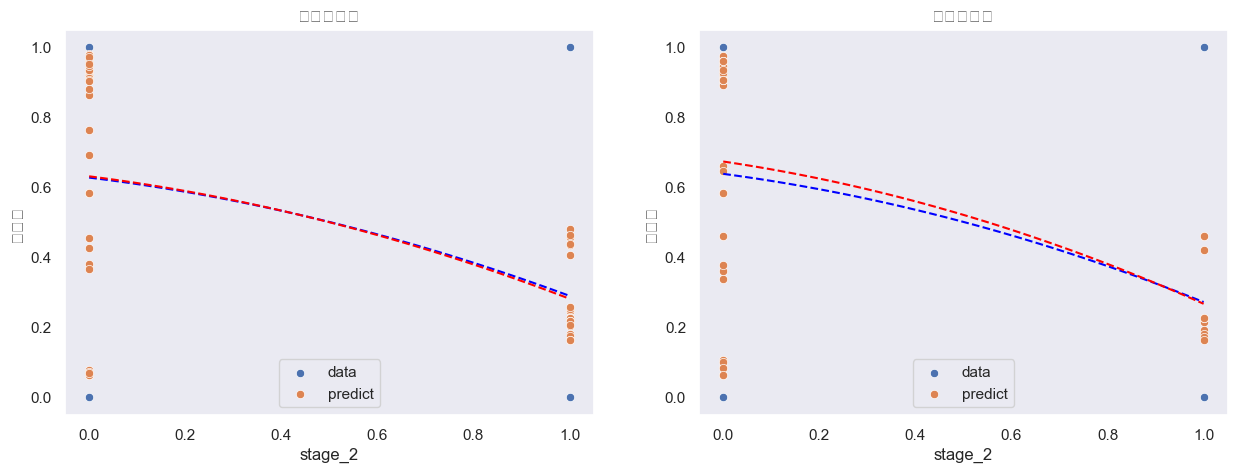

d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1207: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_left, y_left)
d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1214: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_left, y_left_pred)
d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1229: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_right, y_right)
d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1236: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_right, y_right_pred)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_fig

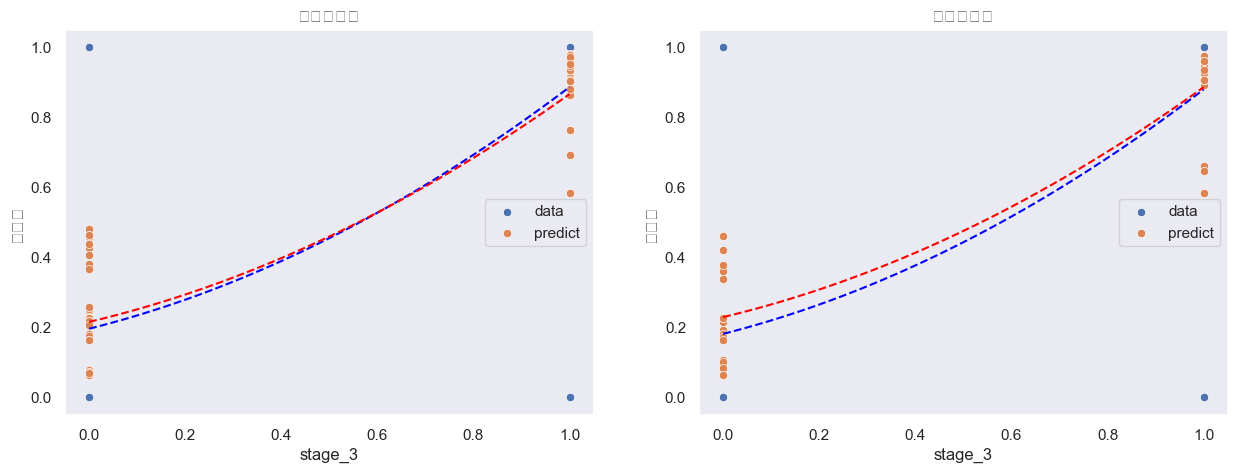

d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1207: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_left, y_left)
d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1214: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_left, y_left_pred)
d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1229: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_right, y_right)
d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1236: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_right, y_right_pred)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_fig

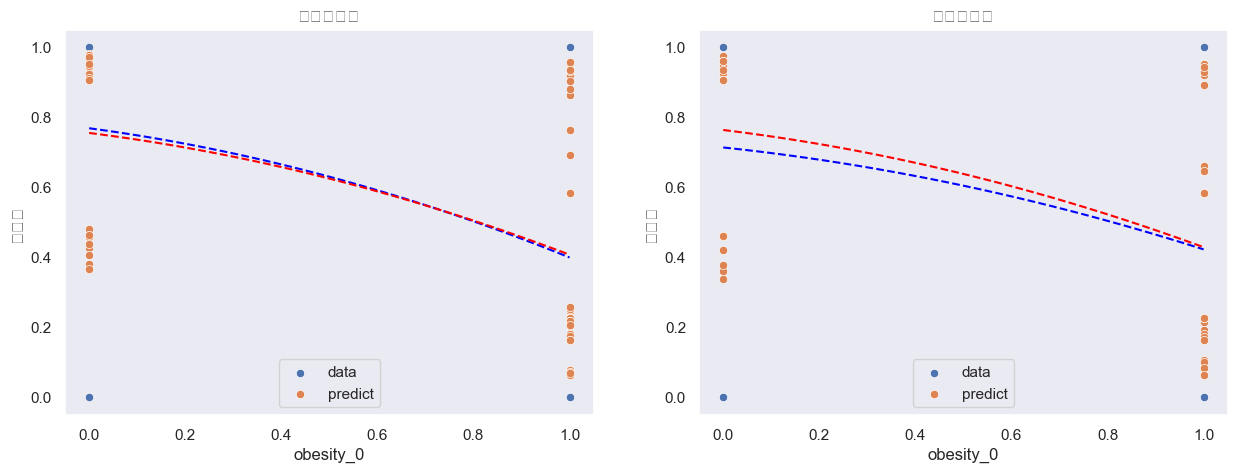

d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1207: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_left, y_left)
d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1214: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_left, y_left_pred)
d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1229: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_right, y_right)
d:\jihun5\jupyter\05-데이터마이닝\03_tensorflow\../..\helper.py:1236: RankWarning: Polyfit may be poorly conditioned
  x, y = getTrend(x_right, y_right_pred)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_fig

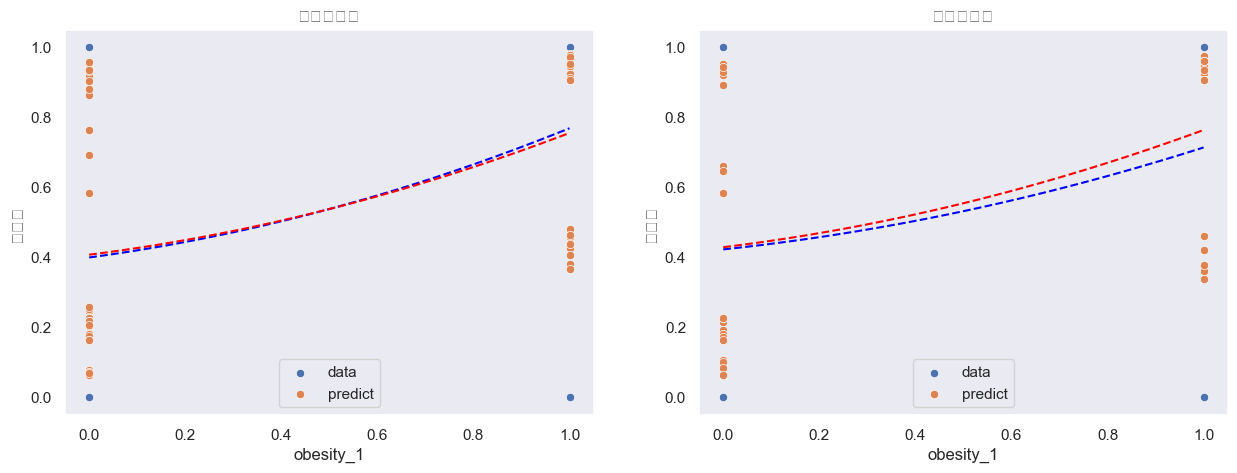

In [23]:
for key in ['CRP','stage_1','stage_2','stage_3','obesity_0','obesity_1']:
    helper.regplot(train_df[key], train_df['관측치'], train_df['예측치'], "훈련데이터",
                   test_df[key], test_df['관측치'], test_df['예측치'], "검증데이터",
                   figsize=(15, 5))